# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Segmentation</p>

In this project, I will be extracting valuable informations from the [Customer Personality Analysis dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis), which contains a plethora of different features about each customer. These feature are going to be useful as we will use them for a form of unsupervised learning : clustering. Indeed, we're going to create clusters of the different kinds of customers to help the choose the right marketing solutions. The data has the following features:

## People

| Name | Description |
| :-----------: | :-----------: |
|ID| Customer's unique identifier|
|Year_Birth| Customer's birth year|
|Education|Customer's education level|
|Marital_Status| Customer's marital status|
|Income| Customer's yearly household income|
|Kidhome| Number of children in customer's household|
|Teenhome| Number of teenagers in customer's household|
|Dt_Customer| Date of customer's enrollment with the company|
|Recency| Number of days since customer's last purchase|
|Complain| 1 if the customer complained in the last 2 years, 0 otherwise|

## Products

| Name | Description |
| :-----------: | :-----------: |
|MntWines| Amount spent on wine in last 2 years|
|MntFruits| Amount spent on fruits in last 2 years|
|MntMeatProducts| Amount spent on meat in last 2 years|
|MntFishProducts| Amount spent on fish in last 2 years|
|MntSweetProducts| Amount spent on sweets in last 2 years|
|MntGoldProds| Amount spent on gold in last 2 years|

## Promotion

| Name | Description |
| :-----------: | :-----------: |
|NumDealsPurchases| Number of purchases made with a discount
|AcceptedCmp1| 1 if customer accepted the offer in the 1st campaign, 0 otherwise|
|AcceptedCmp2| 1 if customer accepted the offer in the 2nd campaign, 0 otherwise|
|AcceptedCmp3| 1 if customer accepted the offer in the 3rd campaign, 0 otherwise|
|AcceptedCmp4| 1 if customer accepted the offer in the 4th campaign, 0 otherwise|
|AcceptedCmp5| 1 if customer accepted the offer in the 5th campaign, 0 otherwise|
|Response| 1 if customer accepted the offer in the last campaign, 0 otherwise|

## Place

| Name | Description |
| :-----------: | :-----------: |
|NumWebPurchases| Number of purchases made through the company’s website|
|NumCatalogPurchases| Number of purchases made using a catalogue|
|NumStorePurchases| Number of purchases made directly in stores|
|NumWebVisitsMonth| Number of visits to company’s website in the last month|




<a id ="1"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Setup</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering





In [2]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

<a id ="1"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Data cleaning</p>

In [3]:
shape = data.shape
print(f"The dataframe has {shape[0]} records and {shape[1]} features")

The dataframe has 2240 records and 29 features


## Missing Data

In [4]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
print("The number of missing values is low, we can consider dropping these records")
data.dropna(inplace=True)
data.isna().sum()

The number of missing values is low, we can consider dropping these records


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Unique values

In [6]:
data.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [7]:
# Get rid of an extreme outlier
data = data[data["Income"] < 600000]

In [8]:
print("Z_CostContact and Z_Revenue  being useless ( they only have one unique value), it's not going to help us, so we can drop them. Same goes for ID, but because it doesn't bring any value")
data.drop(["Z_CostContact", "Z_Revenue", "ID"], inplace=True, axis=1)

Z_CostContact and Z_Revenue  being useless ( they only have one unique value), it's not going to help us, so we can drop them. Same goes for ID, but because it doesn't bring any value


<a id ="2"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Feature engineering</p>

**Some of the features are not very convenient. That's why we're going to change some of them to have more representative features. Among them, we can find these changes :**

* Year_Birth -> Age
* Kidhome + Teenhome -> Kids
* All purchases -> Spent
* All accept campaign offers -> TotalAccepted
* DtCustomer -> YearsSinceCustm

**Moreover, our categorical columns have redundant data (single and alone for marital status). Hence, we're going to change them and limit the number of options :**

* Education : Post-Graduate or Under-Graduate
* Marital Status : Single or Relationship

**Finally, we're going to drop some of the columns we've created features from to avoir multicolinearity**

## Adding and replacing features for convenience

In [9]:
data["Age"] = 2022-data["Year_Birth"]
data[["Age","Year_Birth"]].head()

Age  Year_Birth
0   65        1957
1   68        1954
2   57        1965
3   38        1984
4   41        1981

In [10]:
data["Kids"] = data["Kidhome"] + data["Teenhome"]
data["Kids"].head()

0    0
1    2
2    0
3    1
4    1
Name: Kids, dtype: int64

In [11]:
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data["Spent"].head()

0    1617
1      27
2     776
3      53
4     422
Name: Spent, dtype: int64

In [12]:
data["TotalAccepted"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]
data["TotalAccepted"].head()

0    0
1    0
2    0
3    0
4    0
Name: TotalAccepted, dtype: int64

In [13]:
data["YearsSinceCustm"] = 2022 - data["Dt_Customer"].str.slice(6,10,1).astype("int16")
data["YearsSinceCustm"].head()

0    10
1     8
2     9
3     8
4     8
Name: YearsSinceCustm, dtype: int16

## Change values of categorical data

In [14]:
data["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [15]:
data["Education"].replace(['Graduation', 'PhD', 'Master','2n Cycle'],"Post Graduate", inplace=True)
data["Education"].replace("Basic","Under Graduate", inplace=True)
data["Education"].unique()

array(['Post Graduate', 'Under Graduate'], dtype=object)

In [16]:
data["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [17]:
data["Marital_Status"].replace(["Together","Married"], "Relationship", inplace=True)
data["Marital_Status"].replace(["Divorced","Widow","Alone","Absurd","YOLO"], "Single", inplace=True)
data["Marital_Status"].unique()

array(['Single', 'Relationship'], dtype=object)

## Remove unused columns

In [18]:
# remove tabs
data = data.drop(["Year_Birth","Kidhome","Teenhome","Dt_Customer",
                "AcceptedCmp3","AcceptedCmp2","AcceptedCmp1","AcceptedCmp4","AcceptedCmp5","Complain","Response"], axis=1)
df = data.copy()
data.head()

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0  Post Graduate         Single  58138.0       58       635         88   
1  Post Graduate         Single  46344.0       38        11          1   
2  Post Graduate   Relationship  71613.0       26       426         49   
3  Post Graduate   Relationship  26646.0       26        11          4   
4  Post Graduate   Relationship  58293.0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  Age  Kids  Spent  TotalAccepted  YearsSinceCustm  
0                  7   65     0   1617              0               10  
1                  5   68     2     27              0                8  
2                  4   57     0    776              0                9  
3                  6   38     1     53              0                8  
4                  5   41     1    422              0                8

<a id ="4"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EDA</p>

16% of the customer of this company earn less than 30,000. The median salary is 51,373. Let's see how much do they spend depending on their salary


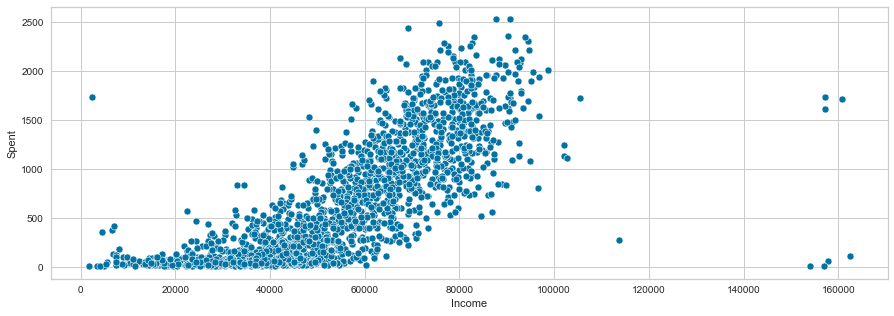

In [19]:
# data["Income"].quantile(0.16)
print(f"16% of the customer of this company earn less than 30,000. The median salary is {data['Income'].median():,.0f}. Let's see how much do they spend depending on their salary")

plt.figure(figsize=(15,5))
sns.scatterplot(x="Income",y="Spent",data=data);

As expected, the more the person earns, the more they spend. How about the case where you have children ?





<AxesSubplot:xlabel='Kids', ylabel='Spent'>

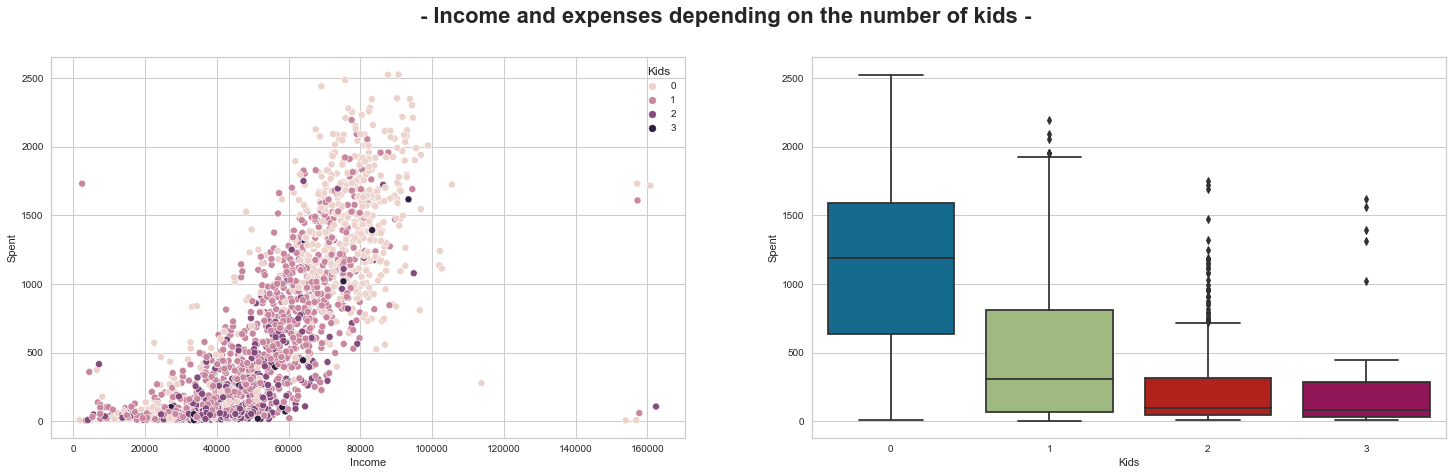

In [20]:
print("As expected, the more the person earns, the more they spend. How about the case where you have children ?\n\n\n")

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("- Income and expenses depending on the number of kids -",size=22,weight="bold")


sns.scatterplot(x="Income",y="Spent",data=data, hue="Kids", ax=ax1)

sns.boxplot(x="Kids",y="Spent",data=data, ax=ax2)

From these plots, we learn 2 things:

* The more children a person has, the less likely they are to spend money
* Income and kids have a negative correlation : a person with fewer kids generally earn more money and the opposite is true as well

We're going to do the same thing depending on the marital status





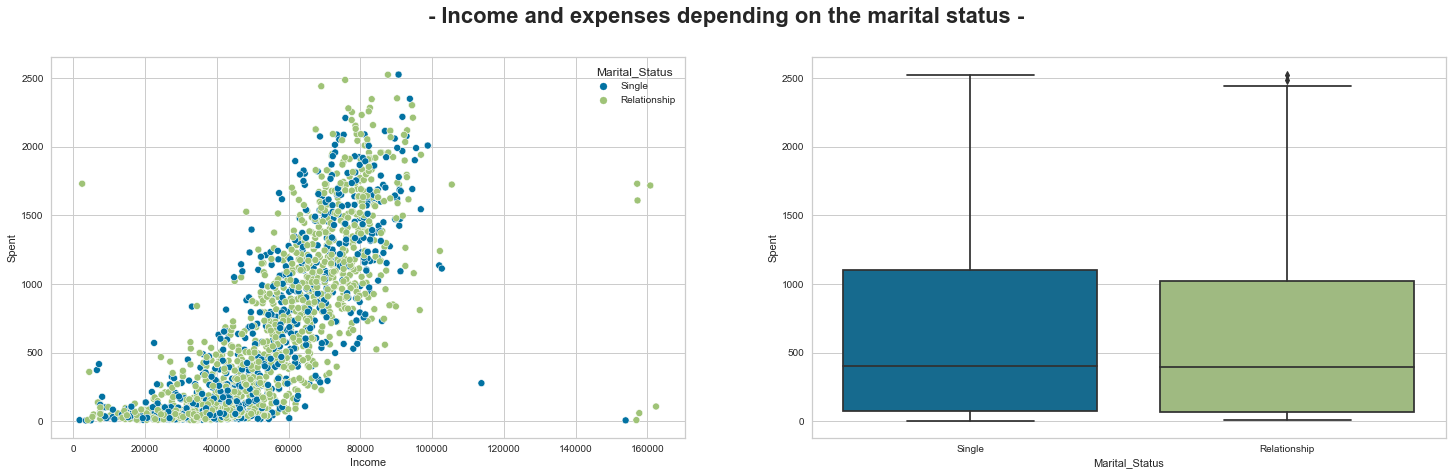

In [21]:
print("We're going to do the same thing depending on the marital status\n\n\n")

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("- Income and expenses depending on the marital status -",size=22,weight="bold")


sns.scatterplot(x="Income",y="Spent",data=data, hue="Marital_Status", ax=ax1)

sns.boxplot(x="Marital_Status",y="Spent",data=data,ax=ax2);

Finally, we're going to check other factors such as loyalty (those who are clients for longer) and Education : 


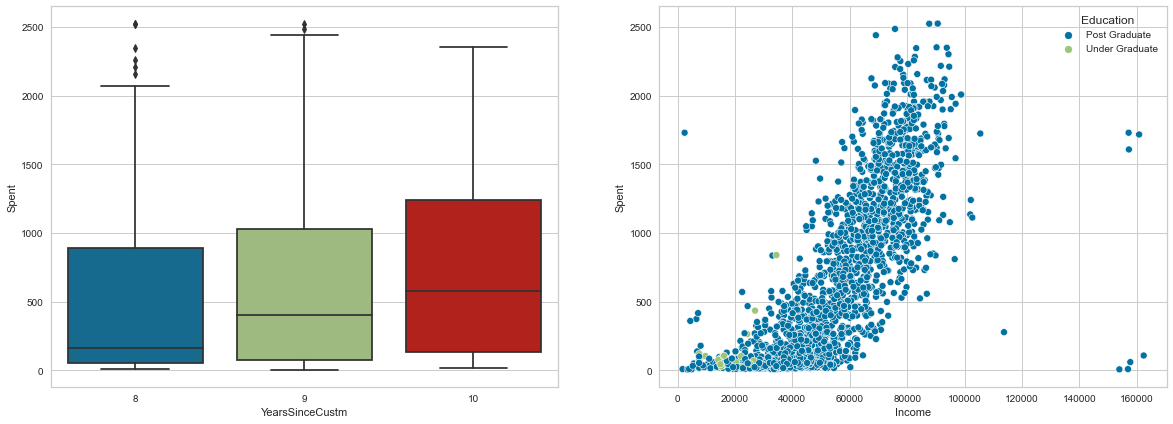

In [22]:
print("Finally, we're going to check other factors such as loyalty (those who are clients for longer) and Education : ")

plt.figure(figsize=(20,7))

plt.subplot(121)
sns.boxplot(data=data, y="Spent", x="YearsSinceCustm")

plt.subplot(122)
sns.scatterplot(x="Income",y="Spent",data=data, hue="Education");

* In addition of being a minority, Under Graduates represent a minority which doesn't spend a lot because they don't earn a lot
* More loyal clients are more likely to spend more money

<a id ="5"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Data preprocessing</p>

**Once again, we don't have much work to do to get the data ready to be used with label encoding :**

* Make everything numerical with a LabelEncoder from sklearn
* Scale the data so features are on the same scale


## Making everything numerical

In [23]:
data.dtypes

Education               object
Marital_Status          object
Income                 float64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Age                      int64
Kids                     int64
Spent                    int64
TotalAccepted            int64
YearsSinceCustm          int16
dtype: object

In [24]:
object_cols = (data.dtypes == 'object')
objects = list(object_cols[object_cols].index)
objects

['Education', 'Marital_Status']

In [25]:
le = LabelEncoder()
for obj in objects:
    data[obj] = data[[obj]].apply(le.fit_transform)

In [26]:
data.dtypes
# all values should be numerical

Education                int32
Marital_Status           int32
Income                 float64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Age                      int64
Kids                     int64
Spent                    int64
TotalAccepted            int64
YearsSinceCustm          int16
dtype: object

## Scaling

Scaling is important when using machine learning algorithms. Otherwise, some features may be seen as more important features

In [27]:
ss = StandardScaler()
ss.fit(data)
scaled = pd.DataFrame(ss.transform(data),columns= data.columns )
scaled.head()

Education  Marital_Status    Income   Recency  MntWines  MntFruits  \
0  -0.158077        1.348357  0.286604  0.310113  0.977779   1.548973   
1  -0.158077        1.348357 -0.261407 -0.380899 -0.872375  -0.637338   
2  -0.158077       -0.741643  0.912723 -0.795506  0.358096   0.568903   
3  -0.158077       -0.741643 -1.176680 -0.795506 -0.872375  -0.561948   
4  -0.158077       -0.741643  0.293806  1.553934 -0.392047   0.418123   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.689714         2.453932          1.484340      0.849633   
1        -0.718196        -0.651178         -0.634081     -0.733043   
2        -0.178646         1.339745         -0.147087     -0.038210   
3        -0.655768        -0.505056         -0.585381     -0.752344   
4        -0.218777         0.152497         -0.000989     -0.559335   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.352088         1.428103             2.504074          -0.554500   
1          -0.167829        -1.125846            -0.571253          -1.169839   
2          -0.687745         1.428103            -0.229550           1.291518   
3          -0.167829        -0.760996            -0.912956          -0.554500   
4           1.391921         0.333553             0.112153           0.060839   

   NumWebVisitsMonth       Age      Kids     Spent  TotalAccepted  \
0           0.693215  0.986016 -1.264487  1.675011      -0.439383   
1          -0.131420  1.236344  1.405522 -0.962727      -0.439383   
2          -0.543738  0.318476 -1.264487  0.279830      -0.439383   
3           0.280897 -1.266933  0.070517 -0.919594      -0.439383   
4          -0.131420 -1.016605  0.070517 -0.307440      -0.439383   

   YearsSinceCustm  
0         1.500024  
1        -1.417055  
2         0.041484  
3        -1.417055  
4        -1.417055

<a id ="6"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Dimensionality Reduction</p>

**We're trying to make clusters. However, clustering algorithms struggle when data have a lot of features or when features have multicolinearity. Fortunately, Principal Component Analysis ( PCA ) allows us to to fix both of these problems very simply. We're going to create one dimension ( called Principal Component, PC's ) for each feature, and then check which ones explain the covariance up to 90%.**

## Find what are the best dimensions

In [28]:
pca = PCA(n_components=len(scaled.columns))
pca.fit(scaled)

PCA(n_components=20)

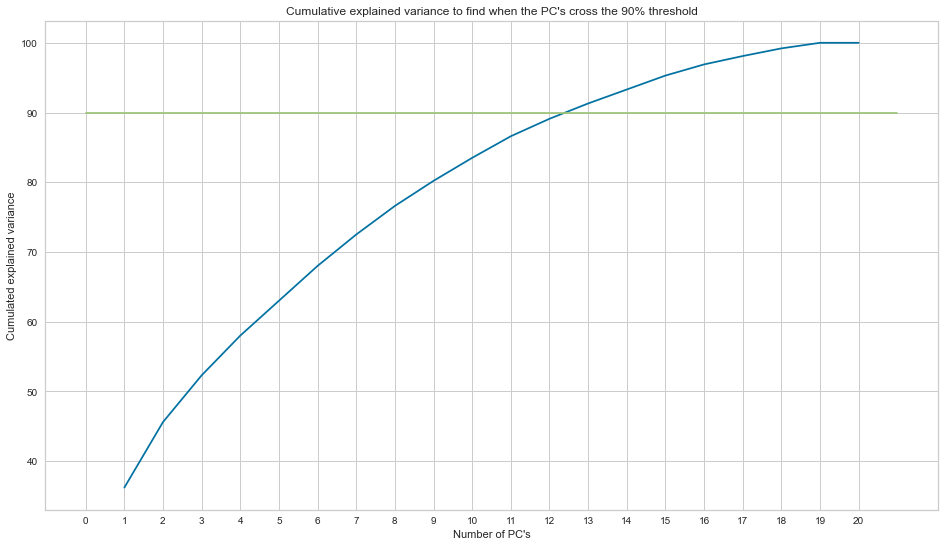

In [29]:
# Explained variance and Scree plot
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
cumu_var = np.cumsum(per_var)

plt.figure(figsize=(16,9))
sns.lineplot(x=range(1,21), y=cumu_var)
sns.lineplot(x=[0,21],y=[90,90])
plt.xticks(range(0,21))
plt.xlabel("Number of PC's")
plt.ylabel("Cumulated explained variance")
plt.title("Cumulative explained variance to find when the PC's cross the 90% threshold");

**Based on this, we'll then use 13 Principal Components for clustering, and 3 to visualize the results. We then managed to get rid of 7 dimensions.**

In [30]:
pca_data = pd.DataFrame(pca.transform(scaled), columns=["PC"+str(i+1) for i in range(len(scaled.columns))]).iloc[:, :13]
pca_data.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.154511  0.989150  1.805621 -1.166414  0.817520  1.167309  0.345928   
1 -2.578421 -0.751936 -1.853154 -0.511800  0.267082  1.512362  0.581236   
2  1.842094 -0.188390 -0.103518 -0.495592 -1.207173 -0.260615  0.438099   
3 -2.586214 -1.201577 -0.174025  0.161087 -1.220005 -0.453227 -0.885100   
4 -0.259993  0.113159 -0.416329 -0.868829  0.677877 -1.363383 -1.030693   

        PC8       PC9      PC10      PC11      PC12      PC13  
0 -1.173813  0.163512  1.176303 -0.487579  2.191696  0.022588  
1  0.372121  0.189523  0.831581 -0.243126 -0.095652  0.003183  
2 -0.548470 -0.708604 -1.690167 -0.087916  0.117566 -0.398215  
3  0.731581 -0.149465 -0.360547  0.104557  0.367778 -0.100453  
4  1.798581  0.329909 -0.380373 -0.182543  0.755499 -0.257664

In [31]:
vis_data = pd.DataFrame(pca.transform(scaled), columns=["PC"+str(i+1) for i in range(len(scaled.columns))]).iloc[:, :3]
vis_data.head()

PC1       PC2       PC3
0  4.154511  0.989150  1.805621
1 -2.578421 -0.751936 -1.853154
2  1.842094 -0.188390 -0.103518
3 -2.586214 -1.201577 -0.174025
4 -0.259993  0.113159 -0.416329

In [32]:
fig= px.scatter_3d(vis_data, x="PC1",y="PC2",z="PC3", opacity=0.5)
fig.update_layout(margin=dict(l=0,b=0,r=0,t=0))

## Checking loading scores

In [33]:
loadings = pca.components_[:13]
df_loadings = pd.DataFrame(loadings.T, columns=["PC"+str(i+1) for i in range(13)], index=data.columns)

fig = px.scatter_3d(df_loadings,
                x="PC1",y="PC2",z="PC3",
             text=df_loadings.index)

fig.update_layout(margin=dict(l=0,b=0,r=0,t=0))
fig.show()

In [34]:
df_loadings

PC1       PC2       PC3       PC4       PC5  \
Education           -0.060961 -0.118502  0.458871  0.129817  0.027767   
Marital_Status       0.007993 -0.033166  0.086065 -0.028230  0.364825   
Income               0.316391  0.005057 -0.241888  0.010461  0.001718   
Recency              0.005627  0.016791 -0.000658 -0.122839  0.901047   
MntWines             0.293950  0.204479 -0.077430  0.335434  0.052978   
MntFruits            0.257353 -0.098152  0.167653 -0.291798 -0.082639   
MntMeatProducts      0.306809 -0.088727  0.038336  0.013165  0.033403   
MntFishProducts      0.267099 -0.105638  0.164658 -0.272720 -0.062735   
MntSweetProducts     0.257908 -0.081293  0.157165 -0.244711 -0.035387   
MntGoldProds         0.212369  0.152247  0.165899 -0.127192 -0.012979   
NumDealsPurchases   -0.048656  0.566044  0.006618 -0.161889 -0.061203   
NumWebPurchases      0.202570  0.405833  0.013291  0.005648 -0.064373   
NumCatalogPurchases  0.305632  0.021796 -0.030248  0.044583  0.039237   
NumStorePurchases    0.272030  0.161216 -0.064598 -0.089161 -0.060085   
NumWebVisitsMonth   -0.233273  0.347569  0.265007  0.158228 -0.006516   
Age                  0.049837  0.168771 -0.476758 -0.175809  0.107878   
Kids                -0.212371  0.326507 -0.235722 -0.150190 -0.008056   
Spent                0.355688  0.072873  0.021929  0.120941  0.027389   
TotalAccepted        0.160879  0.001036 -0.078437  0.699286  0.063240   
YearsSinceCustm      0.033860  0.333926  0.493538  0.023899  0.092746   

                          PC6       PC7       PC8       PC9      PC10  \
Education           -0.074139  0.719552  0.429151  0.157438 -0.044020   
Marital_Status       0.913902 -0.059107  0.112806  0.062958 -0.018679   
Income              -0.000508 -0.006188  0.039150  0.155327 -0.045196   
Recency             -0.376115 -0.087711  0.095760 -0.076010 -0.061328   
MntWines             0.004008  0.042298 -0.019390  0.047839 -0.167242   
MntFruits            0.006590 -0.046900  0.045856 -0.093883  0.109242   
MntMeatProducts     -0.024751 -0.064254 -0.045198  0.351513  0.165874   
MntFishProducts     -0.008526 -0.007715 -0.001582 -0.093230  0.202903   
MntSweetProducts    -0.032009 -0.045536  0.052185 -0.049036  0.075864   
MntGoldProds         0.034882  0.022575  0.110406 -0.609979  0.319606   
NumDealsPurchases   -0.016598 -0.072988  0.357387  0.312354  0.226956   
NumWebPurchases      0.033054  0.030992  0.137225 -0.301955 -0.421703   
NumCatalogPurchases -0.023118  0.019804  0.013145  0.258439  0.214269   
NumStorePurchases   -0.005619  0.023226  0.096987  0.058120 -0.501616   
NumWebVisitsMonth    0.027717 -0.079576 -0.086601 -0.181069  0.023024   
Age                  0.105970  0.664455 -0.365540 -0.130620  0.167697   
Kids                -0.022629 -0.042656  0.235312  0.150369  0.298747   
Spent               -0.006488 -0.005198 -0.011736  0.087108  0.026417   
TotalAccepted       -0.008440 -0.044684  0.103426 -0.191987  0.356981   
YearsSinceCustm     -0.016761  0.036940 -0.639925  0.218392  0.050106   

                         PC11      PC12      PC13  
Education            0.000778 -0.073013 -0.003942  
Marital_Status      -0.019711 -0.029046  0.011670  
Income               0.023070 -0.201475  0.080238  
Recency             -0.031240  0.027023 -0.038509  
MntWines            -0.019132 -0.056605 -0.154160  
MntFruits           -0.319533 -0.035185 -0.667767  
MntMeatProducts      0.107337  0.284652 -0.033445  
MntFishProducts     -0.180104  0.083360 -0.083350  
MntSweetProducts    -0.503295 -0.059970  0.643095  
MntGoldProds         0.551265 -0.196506  0.068354  
NumDealsPurchases    0.074311  0.200368  0.010951  
NumWebPurchases     -0.124003  0.282404  0.161687  
NumCatalogPurchases  0.251042  0.247538  0.108161  
NumStorePurchases    0.038531 -0.372145 -0.123753  
NumWebVisitsMonth   -0.249386  0.345221 -0.156554  
Age                 -0.132111  0.144150 -0.030041  
Kids                -0.204290 -0.470322 -0.045429  
Spent                0

**From this it's hard to tell which feature gives the most explanation. It's not a big deal as we're mostly interested in the characteristics for each cluster, which is the next step**

<a id ="7"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Clustering</p>

## Find the best number of clusters

**The  [elbow method](https://www.youtube.com/watch?v=FqIGui0rwh4) is a way for us to know when it's not necessary to get a bigger number of cluster, hence giving us the optimal number of cluster.**

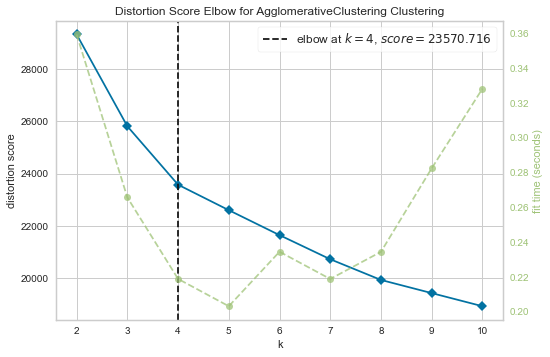

In [35]:
elbow = KElbowVisualizer(AgglomerativeClustering(), k=10)
elbow.fit(pca_data)
elbow.show();

**Indeed, we can clearly see an elbow for k=4, as the rest of the curve is slowly becoming horizontal**

## Create the clusters

In [36]:
ac = AgglomerativeClustering(n_clusters=4)
ac_results = ac.fit_predict(pca_data)
ac_results

array([2, 1, 2, ..., 0, 2, 1], dtype=int64)

In [37]:
# Assign the cluster results to our different dataset, because we can use each of them for a different purpose

vis_data["Cluster"] = ac_results
data["Cluster"] = ac_results
df["Cluster"] = ac_results

In [38]:
df

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0     Post Graduate         Single  58138.0       58       635         88   
1     Post Graduate         Single  46344.0       38        11          1   
2     Post Graduate   Relationship  71613.0       26       426         49   
3     Post Graduate   Relationship  26646.0       26        11          4   
4     Post Graduate   Relationship  58293.0       94       173         43   
...             ...            ...      ...      ...       ...        ...   
2235  Post Graduate   Relationship  61223.0       46       709         43   
2236  Post Graduate   Relationship  64014.0       56       406          0   
2237  Post Graduate         Single  56981.0       91       908         48   
2238  Post Graduate   Relationship  69245.0        8       428         30   
2239  Post Graduate   Relationship  52869.0       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2                 1             6  ...   
2                 127              111                21            42  ...   
3                  20               10                 3             5  ...   
4                 118               46                27            15  ...   
...               ...              ...               ...           ...  ...   
2235              182               42               118           247  ...   
2236               30                0                 0             8  ...   
2237              217               32                12            24  ...   
2238              214               80                30            61  ...   
2239               61                2                 1            21  ...   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  Age  Kids  Spent  TotalAccepted  YearsSinceCustm  \
0                     7   65     0   1617              0               10   
1                     5   68     2     27              0                8   
2                     4   57     0    776              0                9   
3                     6   38     1     53              0                8   
4                     5   41     1    422              0                8   
...                 ...  ...   ...    ...            ...              ...   
2235                  5   55     1   1341              0                9   
2236                  7   76     3    444              1                8   
2237                  6   41     0   1241              1                8   
2238                  3   66     1    843              0                8   
2239                  7   68     2    172              0               10   

      Cluster  
0           2  
1           1  
2           2  
3           1  
4           1  
...       ...  
2235        2  
2236        2  
2237        0  
2238        2  
2239        1  

[2215 rows x 21 columns]

<a id ="8"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Profiling</p>

Seem like cluster 1 is the main type of customer, while cluster 3 is a very rare customer. Indeed, they both represent 48% and 3% of the customers.


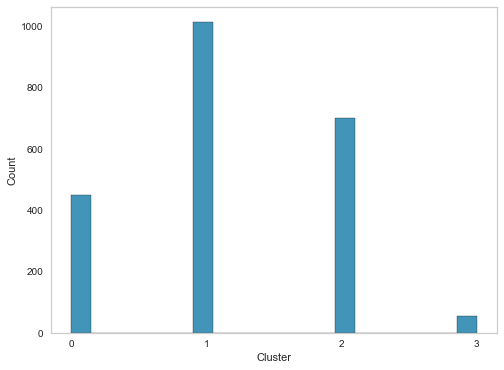

In [39]:
plt.figure(figsize=(8,6))
plt.xticks(range(4))
plt.grid(False)
sns.histplot(data["Cluster"])
print( f"Seem like cluster 1 is the main type of customer, while cluster 3 is a very rare customer. \
Indeed, they both represent {data['Cluster'].value_counts()[1] / data.shape[1]:.0f}% and {data['Cluster'].value_counts()[3] / data.shape[1]:.0f}% of the customers.");

## Find the average of each group

In [40]:
clusters_details = {}

for cluster in range(4):
    clusters_details[str(cluster)] = {}
    for column in data.columns[2:-1]:
        clusters_details[str(cluster)][column] = round(data[data["Cluster"]==cluster][column].mean(),2)

In [41]:
dict(
    round(
        df[df["Cluster"]==0]["Marital_Status"].value_counts() /
        df[df["Cluster"]==0]["Marital_Status"].shape[0]
        ,2)
)

{'Relationship': 0.57, 'Single': 0.43}

In [42]:
for cluster in range(4):
    for column in data.columns[:2]: 
        column_results = dict(
    round(
        df[df["Cluster"]==cluster][column].value_counts() /
        df[df["Cluster"]==cluster][column].shape[0]
        ,2)
)
        for result in column_results:
            clusters_details[str(cluster)][result] = column_results[result]

In [43]:
pd.DataFrame(clusters_details)

0         1         2         3
Income               77728.80  35803.80  61261.47  20306.26
Recency                 51.12     48.79     48.06     48.44
MntWines               641.53     53.72    476.10      7.24
MntFruits               63.68      5.24     34.13     11.11
MntMeatProducts        492.10     27.27    172.68     11.44
MntFishProducts         98.18      7.88     43.46     17.06
MntSweetProducts        70.72      5.30     31.61     12.11
MntGoldProds            77.27     17.52     62.51     22.83
NumDealsPurchases        1.18      2.14      3.36      1.80
NumWebPurchases          4.80      2.35      6.31      1.89
NumCatalogPurchases      6.29      0.61      3.50      0.48
NumStorePurchases        8.16      3.37      8.03      2.85
NumWebVisitsMonth        2.55      6.46      5.32      6.87
Age                     53.04     50.94     57.18     44.54
Kids                     0.12      1.26      1.04      0.72
Spent                 1443.49    116.93    820.49     81.80
TotalAccepted            0.90      0.08      0.25      0.11
YearsSinceCustm          8.94      8.90      9.07      9.22
Post Graduate            1.00      1.00      1.00       NaN
Relationship             0.57      0.68      0.64      0.63
Single                   0.43      0.32      0.36      0.37
Under Graduate            NaN       NaN       NaN      1.00

**We now have a general idea of the median client for each cluster, let's plot the details to have a better understanding**

## Visually represent each cluster for each feature

In [44]:
object_cols = ["Education", "Marital_Status"]
num_cols = list(data.columns[2:-1])

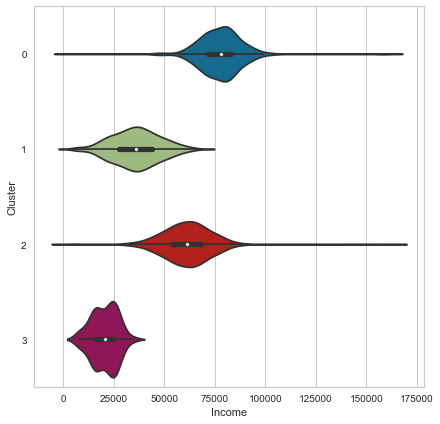

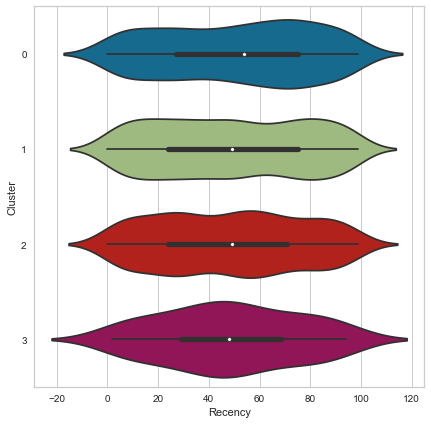

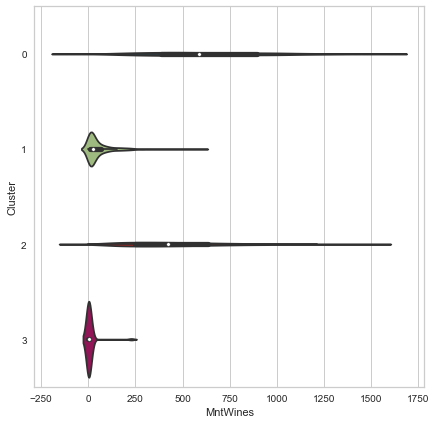

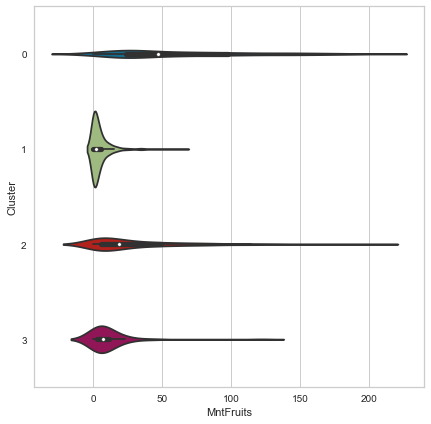

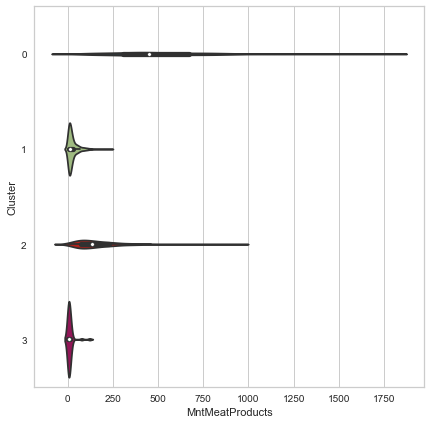

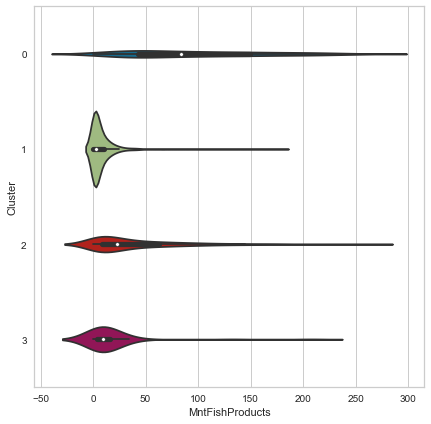

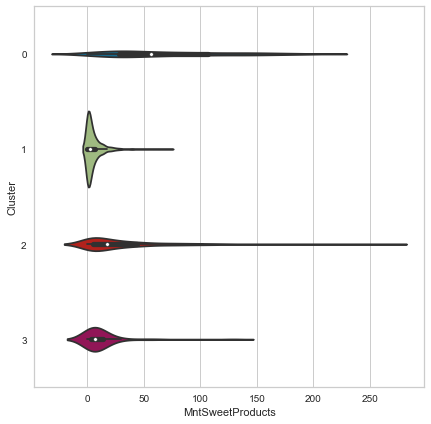

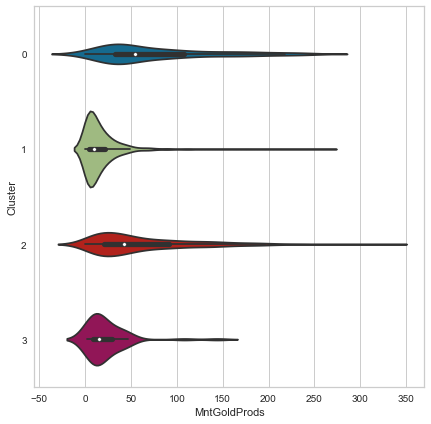

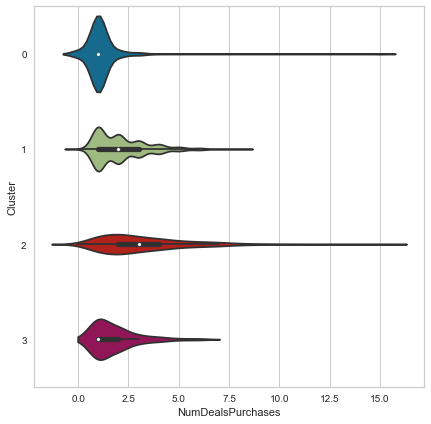

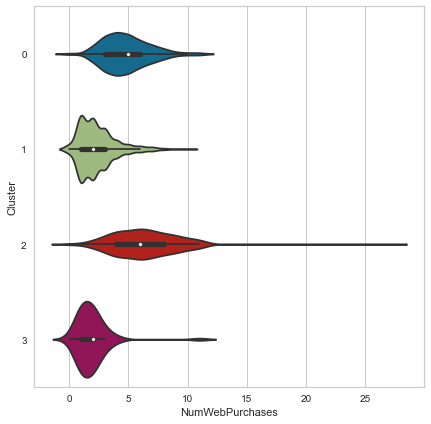

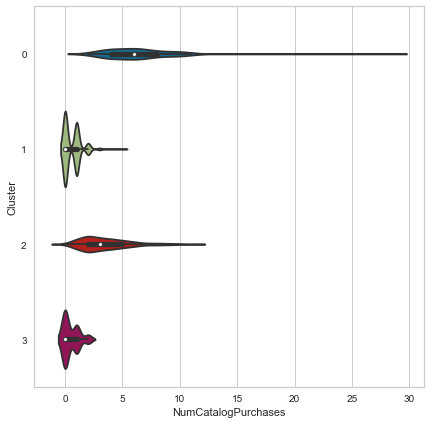

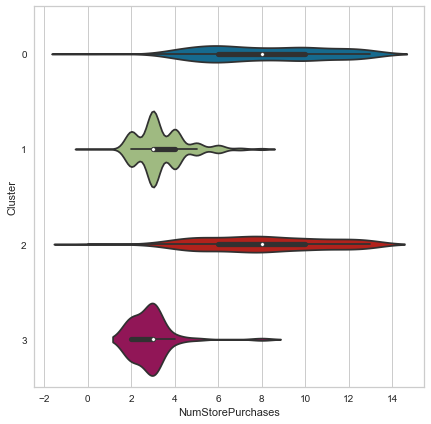

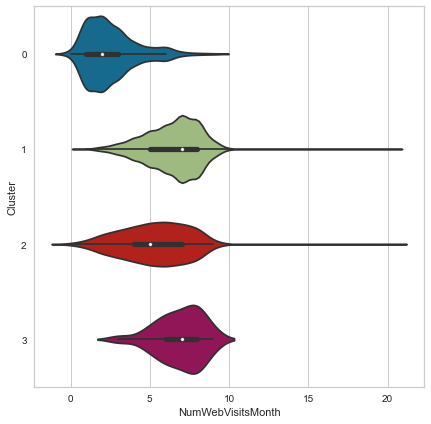

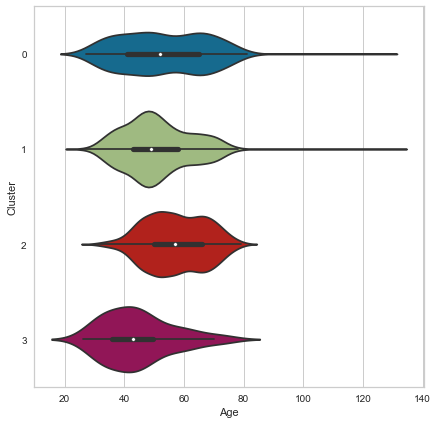

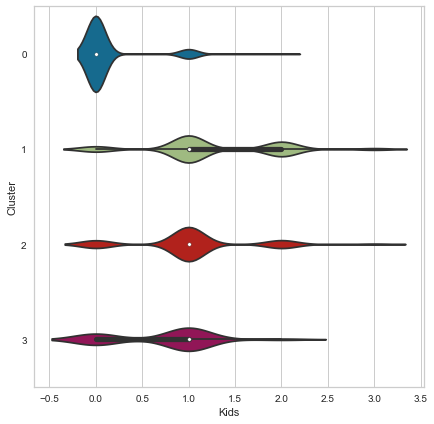

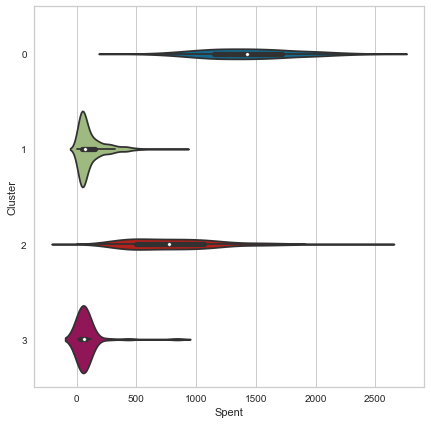

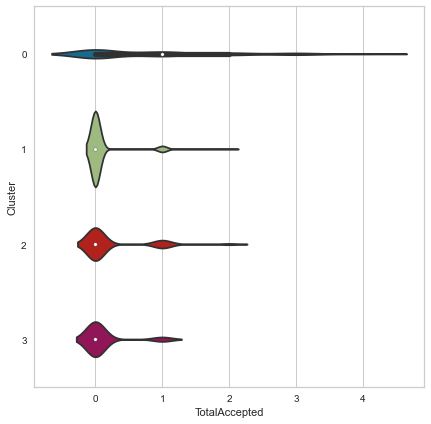

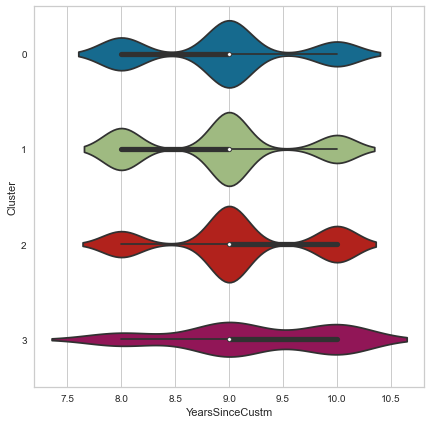

In [45]:
for column in num_cols:
    plt.figure(figsize=(7,7))
    sns.violinplot(y=df["Cluster"], x=df[column], orient="h")
    plt.show();

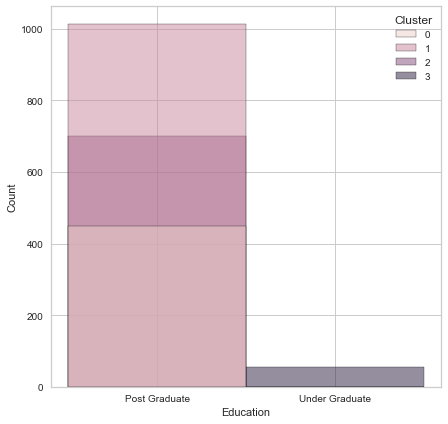

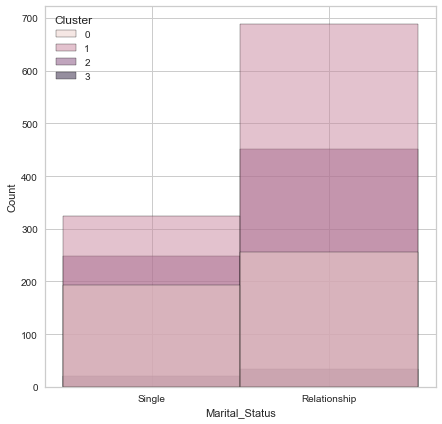

In [46]:
for column in object_cols:
    plt.figure(figsize=(7,7))
    sns.histplot(x=df[column], hue =df["Cluster"])
    plt.show()

<a id ="9"></a>
# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Observations</p>

* The two most-spending clusters are 0 and 2, so they are our main interest
* The income linearly influences the amount spent, from the most paid to the less paid : 0 - 2 - 1 - 3
* The last time a person bought something ( recency ) does NOT have an impact on the cluster
* Clusters 0 and 2 are A LOT into meat and wines
* Cluster 2 buys twice as much items at discounts as clusters 0 and 3
* Cluster 2 buys a lot of items on the Internet
* Cluster 0 buys a lot if items with a Catalog
* Clusters 1, 2 and 3 spend a lot of time on the website, whereas cluster 0 barely do it
* In average, clusters 0 and 1 are the oldest (\~55), cluster 2 is slightly younger (\~50) and cluster 3 is the youngest (~44)
* Cluster 0 generally doesn't have any kid, cluster 3 sometimes have a kid, clusters 1 and 2 generally have a kid or more
* Cluster 0 generally accept offers during campaign, while cluster 3 rarely do it
* All clusters are post-graduate except cluster 3
* Cluster 0 is slightly more likely to be single than the others, while Cluster 1 is slightly less likely than the others